# West Nile Virus in Chicago: Investigation of `train.csv` and `test.csv`
---

## Content
---

- [Locations](../code/99_Locations.ipynb)
- [Data Cleaning Summary](../code/01_Data_Cleaning.ipynb) 
- [Train-test Investigation](../code/01a_Train_Test_Investigation.ipynb) **Current Notebook**
- [Weather Investigation](../code/01b_Weather_Investigation.ipynb)
- [Spray Investigation](../code/01c_Spray_Investigation.ipynb)
- [Feature Engineering](../code/02a_Feature_Engineering.ipynb)
- [Combined EDA and Preprocessing](../code/02b_Combined_EDA_and_Preprocessing.ipynb)
- [Model Tuning & Conclusion](../code/03_Model_Tuning_&_Conclusion.ipynb)

### Import Library
---

In [1]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

# Import graph style
plt.style.use('fivethirtyeight')

# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [2]:
# Read the data
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')
spray = pd.read_csv('../assets/spray.csv')
weather = pd.read_csv('../assets/weather.csv')

In [3]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
# Shape of the train data
train.shape

(10506, 12)

In [5]:
# Columns
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [6]:
# No null values
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

## Duplicate entries

In [7]:
train[train['NumMosquitos'] < 50][train[train['NumMosquitos'] < 50].duplicated(keep=False)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
511,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
818,2007-08-01,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9678,2013-08-15,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,3,0
10101,2013-09-06,"3700 South Pulaski Road, Chicago, IL 60623, USA",CULEX PIPIENS,37,S PULASKI RD,T063,"3700 S PULASKI RD, Chicago, IL",41.825610,-87.726549,9,9,0
10102,2013-09-06,"3700 South Pulaski Road, Chicago, IL 60623, USA",CULEX PIPIENS,37,S PULASKI RD,T063,"3700 S PULASKI RD, Chicago, IL",41.825610,-87.726549,9,9,0
10391,2013-09-19,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,13,0


In [ ]:
# Duplicate entries, any entry less than 50 and check if they're duplicated
# They make up less than 2.2%
len(train[train['NumMosquitos'] < 50][train[train['NumMosquitos'] < 50].duplicated(keep=False)]) / len(train)

0.019798210546354465

Duplicate entries were found in the train dataframe in which any entry with less than 50 mosquitoes were filtered out. 
As they make up less than 2.25% of the data, these were removed.

In [ ]:
# Drop the duplicate entries
duplicate_entries = train[train['NumMosquitos'] < 50][train[train['NumMosquitos'] < 50].duplicated(keep=False)].index
train = train.drop(duplicate_entries, axis='rows')

In [ ]:
train.shape

(10298, 12)

The number of mosquitoes are capped at 50 per entry. This makes it difficult to capture the trend on the number of mosquitoes against other features.
The number of mosquitoes feature will get summed up per entry to ensure consistency and to capture the underlying trend of the number of mosquitoes against other features in the dataset.

In [ ]:
#fix NumMosquitos column
train['NumMosquitos_sum'] = np.nan #create sum column
#fill sum column with sum of matching rows
train['NumMosquitos_sum'].fillna(train.groupby(['Date','Trap','Species'])['NumMosquitos'].transform('sum'), inplace=True)
train.drop(['NumMosquitos'], axis=1, inplace=True) #drop old column
train.drop_duplicates(inplace=True) #drop duplicated rows 
train.reset_index(inplace=True) #reset index

# EDA on training Set

In [ ]:
# The first 5 sets of the training set
train.head()

,index,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,NumMosquitos_sum
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,1.0
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,1.0
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,0,1.0
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,0,1.0
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,0,4.0


In [ ]:
# A total of 12 columns with 10,506 entries
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   8559 non-null   int64  
 1   Date                    8559 non-null   object 
 2   Address                 8559 non-null   object 
 3   Species                 8559 non-null   object 
 4   Block                   8559 non-null   int64  
 5   Street                  8559 non-null   object 
 6   Trap                    8559 non-null   object 
 7   AddressNumberAndStreet  8559 non-null   object 
 8   Latitude                8559 non-null   float64
 9   Longitude               8559 non-null   float64
 10  AddressAccuracy         8559 non-null   int64  
 11  WnvPresent              8559 non-null   int64  
 12  NumMosquitos_sum        8559 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 869.4+ KB


Time will get converted to it's data time format for Exploratory Data Analysis later.

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,8559.0,5469.334969,2998.994659,0.000000,3076.500000,5580.000000,8011.500000,10505.000000
Block,8559.0,38.804300,24.115034,10.000000,14.000000,37.000000,58.000000,98.000000
Latitude,8559.0,41.844278,0.107040,41.644612,41.750498,41.857402,41.944869,42.017430
Longitude,8559.0,-87.695077,0.084809,-87.930995,-87.752411,-87.694991,-87.642984,-87.531635
AddressAccuracy,8559.0,7.934572,1.327235,3.000000,8.000000,8.000000,9.000000,9.000000
WnvPresent,8559.0,0.053277,0.224599,0.000000,0.000000,0.000000,0.000000,1.000000
NumMosquitos_sum,8559.0,19.592008,97.661667,1.000000,2.000000,4.000000,11.000000,2532.000000


## Correlation between number of mosquitos and the presence of WNV

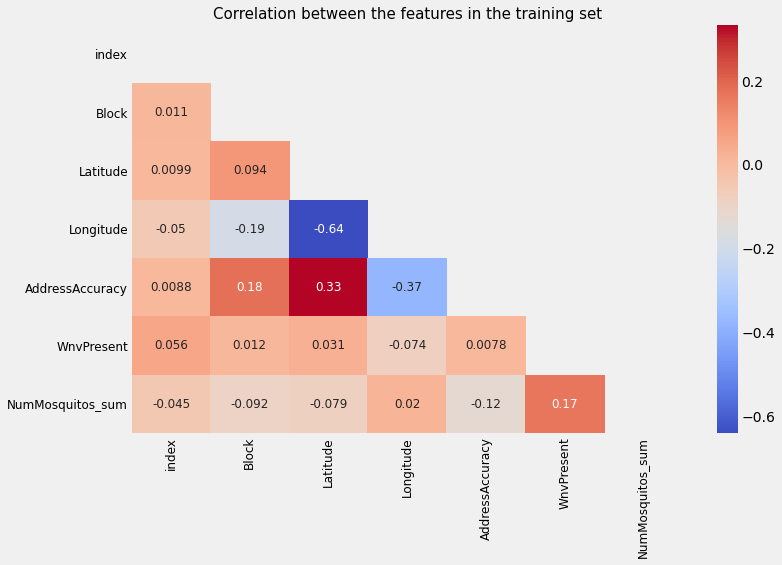

In [ ]:
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(11,7))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True, mask = mask, annot_kws={'size':12})
plt.title('Correlation between the features in the training set', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

With a correlation of *0.17*, there is small levels of correlation between `WnvPresent` and ` NumMosquitos`. There is also very little correlation between the other features except for `Longitude` and `Latitude`.

## Investigating whether the WNV occurs in the same areas every year
---

In [10]:
# Convert Date type from object to Datetime
train['Date'] = pd.to_datetime(train['Date'])
train['Date']

0       2007-05-29
1       2007-05-29
2       2007-05-29
3       2007-05-29
4       2007-05-29
           ...    
10501   2013-09-26
10502   2013-09-26
10503   2013-09-26
10504   2013-09-26
10505   2013-09-26
Name: Date, Length: 10506, dtype: datetime64[ns]

In [11]:
# Add the year column into the dataframe
train.insert(1,'year', train['Date'].dt.year)
train.head(3)

,Date,year,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,2007,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [ ]:
# 2007
WNV_2007 = train.loc[(train['WnvPresent'] == 1) & (train['year'] == 2007)]['Street'].value_counts(normalize=True)[:10]

# 2009
WNV_2009 = train.loc[(train['WnvPresent'] == 1) & (train['year'] == 2009)]['Street'].value_counts(normalize=True)[:10]

# 2011
WNV_2011 = train.loc[(train['WnvPresent'] == 1) & (train['year'] == 2011)]['Street'].value_counts(normalize=True)[:10]

# 2013
WNV_2013 = train.loc[(train['WnvPresent'] == 1) & (train['year'] == 2013)]['Street'].value_counts(normalize=True)[:10]

In [ ]:
# No common places between 2009 to 2013
WNV_2007.index.intersection(WNV_2009.index).intersection(WNV_2011.index).intersection(WNV_2013.index)

Index([], dtype='object')

In [ ]:
# Most common place between 2007 to 2009
WNV_2007.index.intersection(WNV_2009.index)

Index([' N OAK PARK AVE'], dtype='object')

In [ ]:
# Most common place between 2009 to 2011
WNV_2009.index.intersection(WNV_2011.index)

Index([' W OHARE AIRPORT', ' W OHARE', ' S KOSTNER AVE'], dtype='object')

In [ ]:
# Most common place between 2011 to 2013
WNV_2011.index.intersection(WNV_2013.index)

Index([' W OHARE AIRPORT', ' N MILWAUKEE AVE', ' S KOSTNER AVE',
       ' N PULASKI RD'],
      dtype='object')

`W OHARE AIRPORT` and ` S KOSTNER AVE` are the most common streets to have mosquitos with WNV present **between 2009 and 2013**.

## Top occurrences of WNV in the streets

Text(0, 0.5, 'Count')

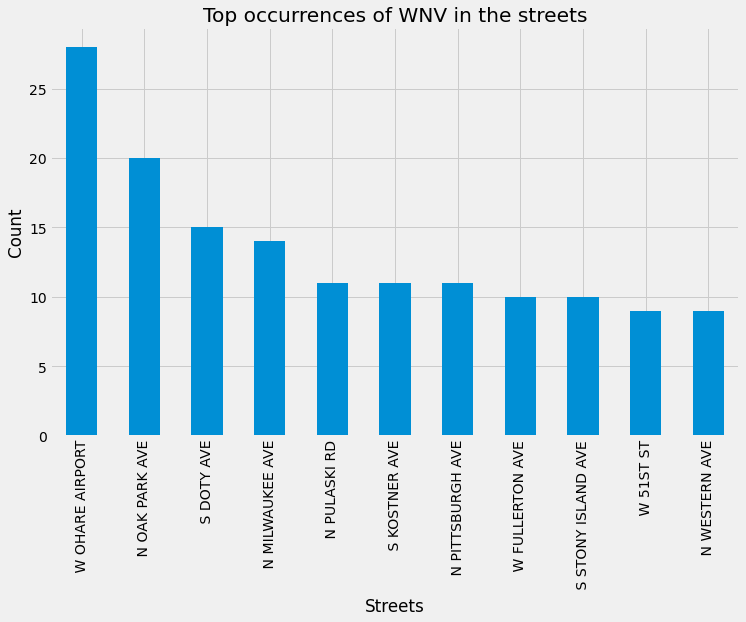

In [ ]:
# Top occuring streets with WNV
train[train['WnvPresent'] == 1]['Street'].value_counts()[:11].plot(kind='bar', figsize=(11,7), title='Top occurrences of WNV in the streets')

plt.xlabel("Streets")
plt.ylabel("Count")

`W OHARE AIRPORT`, `N OAK PARK AVE` and `S DOTY AVE` are the areas in which the WNV occurs the most.

## Months where the WNV presence is large

In [12]:
# Insert the months
train.insert(2,'month',train['Date'].dt.month_name())

Text(0.5, 0, 'Months')

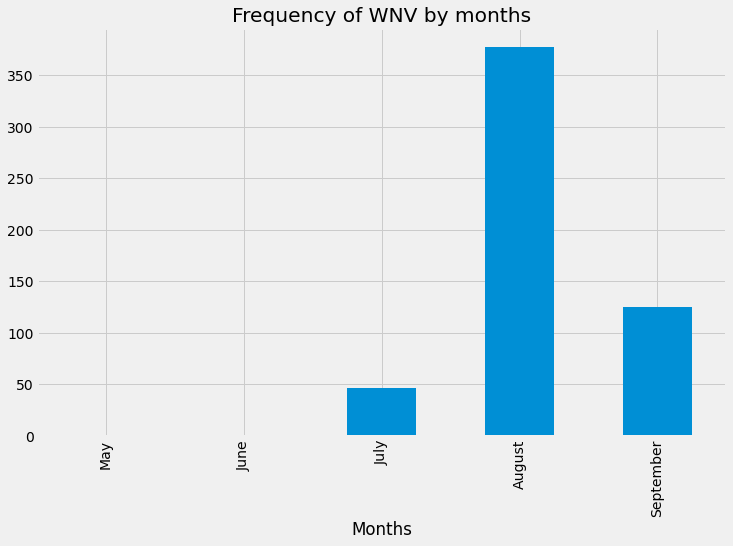

In [16]:
# Sorted chronologically
train.groupby('month').sum()['WnvPresent'].reindex(['May','June','July','August','September']).plot(kind='bar',
                                                                            title='Frequency of WNV by months', figsize=(11,7))
plt.xlabel('Months')                                                                         

`August` is the highest occurrence of WNV followed by a large dip in `September`.

## How many species there are and if there is a greater incidence of WNV in certain species

In [ ]:
# Species of mosquitos
train['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [ ]:
# A total of 7 unique species of mosquitos in the dataset
train['Species'].nunique()

7

A total of 7 species were found in the training set.

In [ ]:
# Mosquito species with WNV present
train[['Species','WnvPresent']].groupby('Species').sum().sort_values(by='WnvPresent',ascending=False)

,WnvPresent
Species,
CULEX PIPIENS/RESTUANS,224
CULEX PIPIENS,184
CULEX RESTUANS,48
CULEX ERRATICUS,0
CULEX SALINARIUS,0
CULEX TARSALIS,0
CULEX TERRITANS,0


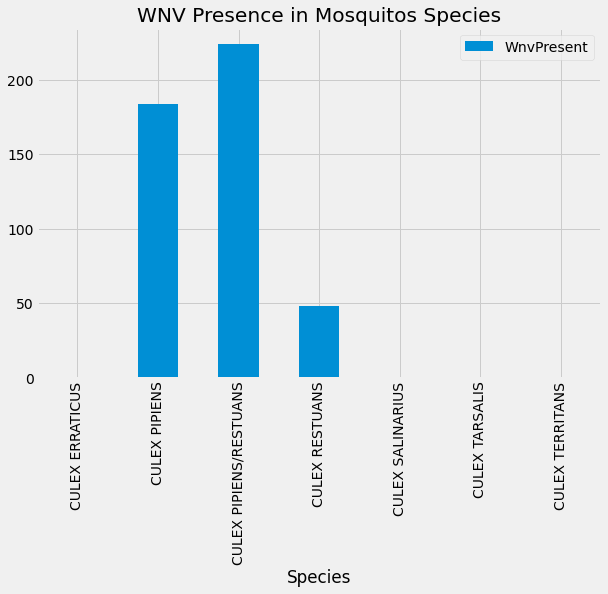

In [ ]:
train[['Species','WnvPresent']].groupby('Species').sum().plot(kind='bar', figsize=(9,6), title="WNV Presence in Mosquitos Species");

The most common type of mosquito to have west nile virus in them is the `CULEX PIPIENS`,`CULEX RESTUANS` and the `CULEX PIPIENS/RESTAUANS`. `CULEX PIPIENS/RESTUANS` could mean a hybrid species or the traps caught both species.

# Address Accuracy exploration

In [ ]:
train['AddressAccuracy'].unique()

array([9, 8, 5, 3])

From the kaggle website, AddressAccuracy: accuracy returned from GeoCoder.

Geocoding is the process of **taking a text-based description of a location**, such as an **address** or the **name of a place**, and returning **geographic coordinates, frequently latitude/longitude pair**, to identify a location on the Earth's surface.

Source: [GeoEncoding](https://en.wikipedia.org/wiki/Geocoding#:~:text=Geocoding%20is%20the%20process%20of,location%20on%20the%20Earth's%20surface.)

In [ ]:
# They make up 18% of the data
len(train[(train['AddressAccuracy'] == 3) | (train['AddressAccuracy'] == 5)]) / len(train)

0.13891809790863419

In [ ]:
train['AddressAccuracy'].value_counts(normalize=True)*100

8    49.152938
9    36.955252
5    12.980488
3     0.911321
Name: AddressAccuracy, dtype: float64

In [ ]:
# Drop the rows where address accuracy is 3 or 5
train = train.drop(train[(train['AddressAccuracy'] == 5) | (train['AddressAccuracy'] == 3)].index, axis='rows')
train.shape

(7370, 15)

Drop rows where the address accuracy is either 5 or 3 as it's shown to be inaccurate addresses.

## Plot the latitude and longitude to detect the WNV hotspots

In [ ]:
train.head(3)

,index,year,month,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,NumMosquitos_sum
0,0,2007,May,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,1.0
1,1,2007,May,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,1.0
2,2,2007,May,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,0,1.0


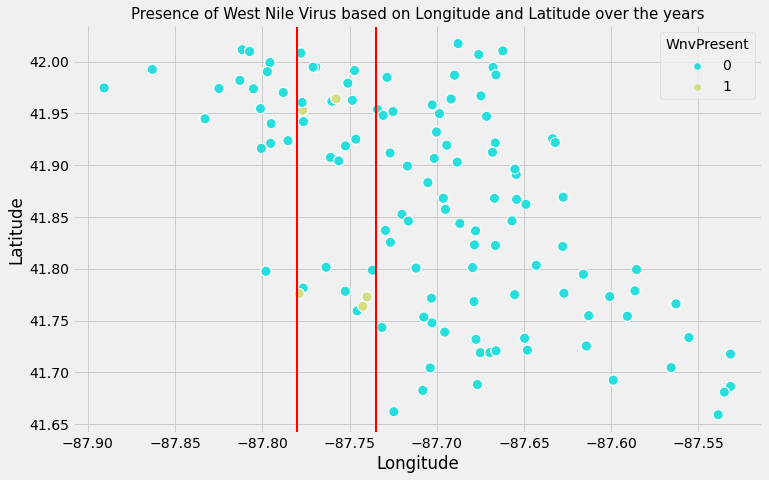

In [ ]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='Longitude', y='Latitude', data=train, hue='WnvPresent', palette='rainbow', s=100)
plt.title('Presence of West Nile Virus based on Longitude and Latitude over the years', fontsize=15)
plt.axvline(x=-87.78, color='r', lw=2)
plt.axvline(x=-87.735, color='r', lw=2);

There are only **5 hotspots with the WNV** among the entire area throughout the years.

In [ ]:
narrow_location = train[(train['Longitude'] > -87.80) & (train['Longitude'] < -87.735)]
narrow_location[narrow_location['WnvPresent'] == 1]['Street'].value_counts(normalize=True)

 N MILWAUKEE AVE     0.144330
 W FULLERTON AVE     0.103093
 N MOSELL AVE        0.092784
 S KOLMAR            0.092784
 N LARAMIE AVE       0.072165
 W 64TH ST           0.061856
 N OAK PARK AVE      0.051546
 S CENTRAL AVE       0.051546
 N AVONDALE AVE      0.041237
 W STRONG ST         0.041237
 W 63RD ST           0.041237
 N LEMONT AVE        0.041237
 S NORDICA           0.020619
 W 72ND ST           0.020619
 N RUTHERFORD AVE    0.020619
 W ROSCOE ST         0.020619
 N LAWLER AVE        0.020619
 W BELDEN AVE        0.010309
 W MONTANA ST        0.010309
 N AUSTIN AVE        0.010309
 S KILPATRICK AVE    0.010309
 S CICERO AVE        0.010309
 N MCCLELLAN AVE     0.010309
Name: Street, dtype: float64

These are the areas which have the WNV in them as per the graph on longitude and latitude.

## Type of mosquitos in the area

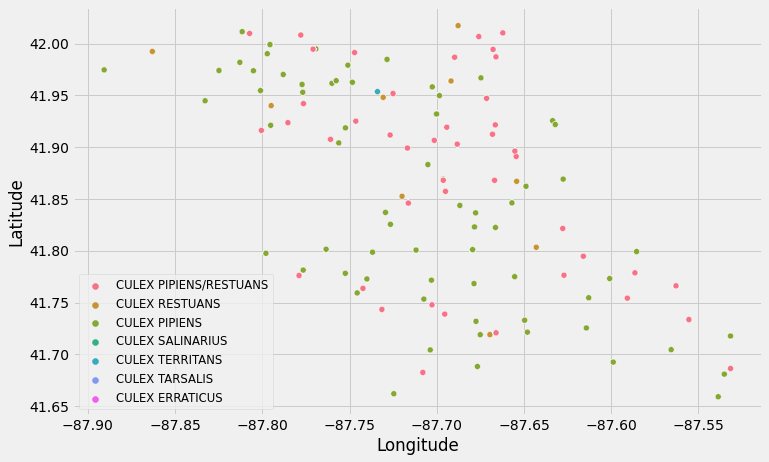

In [ ]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='Longitude', y='Latitude', data=train, hue='Species')
plt.legend(loc='lower left', fontsize='small')

`PIPIENS/RESTUANS` and `PIPIENS` seems to be the dominant species in the dataset.

## Distribution of the number of mosquitos caught

Text(0.5, 0, 'Number of mosquitoes caught')

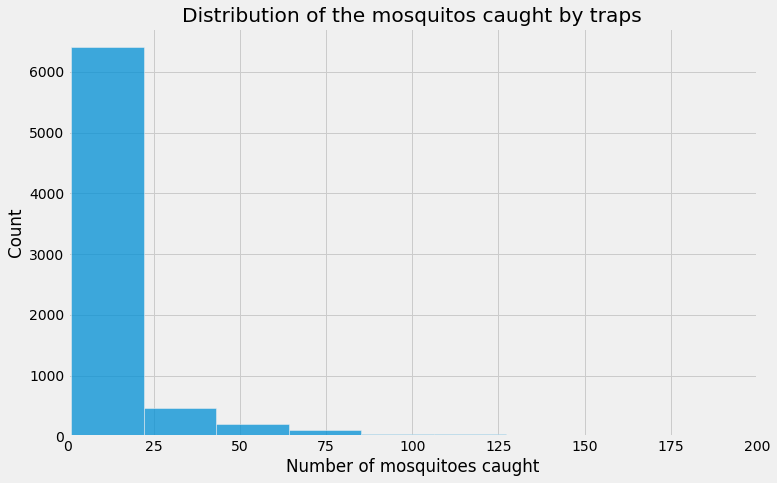

In [ ]:
plt.figure(figsize=(11,7))
sns.histplot(data=train['NumMosquitos_sum'],bins=70)

plt.xlim(0,200)
plt.title('Distribution of the mosquitos caught by traps')
plt.xlabel('Number of mosquitoes caught')

Around 25 mosquitos was caught most of the time by the traps most of the time.

## Number of mosquitos over the months and the WNV presence

Text(0.5, 1.0, 'Presence of WNV based of months and Number of mosquitos')

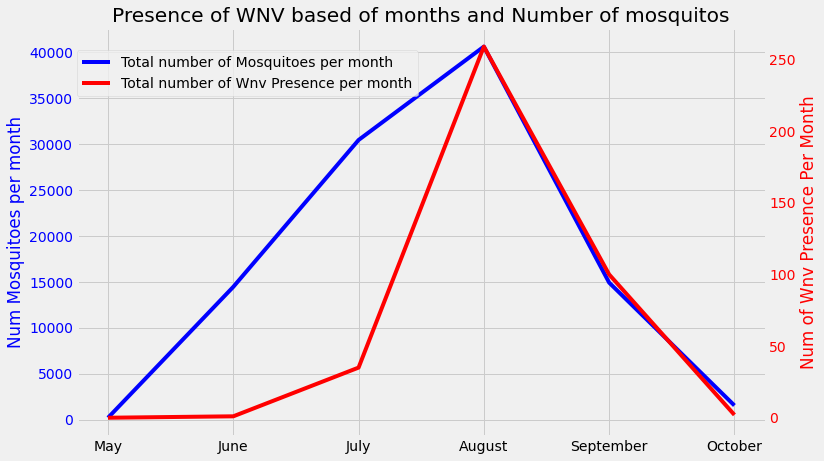

In [ ]:
Num_mosquitoes_month = train[['month','NumMosquitos_sum','WnvPresent']].groupby('month').sum().reindex(index=train['month'].unique())['NumMosquitos_sum']
WnvPresent_month = train[['month','NumMosquitos_sum','WnvPresent']].groupby('month').sum().reindex(index=train['month'].unique())['WnvPresent']

fig = plt.figure(figsize=(11,7))
ax1 = fig.add_subplot(111)
ax1.plot(Num_mosquitoes_month,'b-',label='Total number of Mosquitoes per month')
ax1.set_ylabel('Num Mosquitoes per month', color='b')

for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(WnvPresent_month,'r-',label='Total number of Wnv Presence per month')
ax2.set_ylabel('Num of Wnv Presence Per Month', color='r')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.grid(False)

# ax1.legend(['Num_mosquitoes_month'])
# ax2.legend(['Total Number of Wnv Presence per month'])

ax2.figure.legend(bbox_to_anchor=(0.52, 0.85))

plt.title('Presence of WNV based of months and Number of mosquitos')


An increase of mosquitos from May to August, the peak was in August, but it starts to decline from there onwards.

July, August and September are the months which have mosquitos with the largest WNV presence.

## Number of mosquitos and WNV presence over the years

Text(0.5, 1.0, 'Presence of WNV based of years and Number of mosquitos')

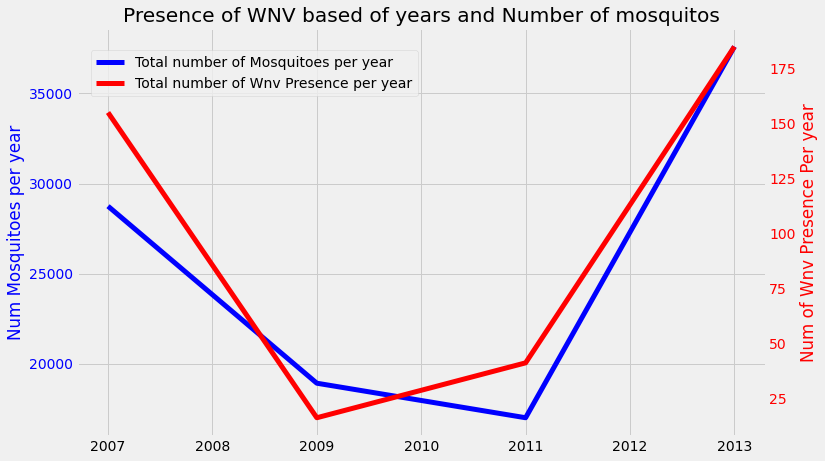

In [ ]:
Num_mosquitoes_month = train[['year','NumMosquitos_sum','WnvPresent']].groupby('year').sum().reindex(index=train['year'].unique())['NumMosquitos_sum']
WnvPresent_month = train[['year','NumMosquitos_sum','WnvPresent']].groupby('year').sum().reindex(index=train['year'].unique())['WnvPresent']

fig = plt.figure(figsize=(11,7))
ax1 = fig.add_subplot(111)
ax1.plot(Num_mosquitoes_month,'b-',label='Total number of Mosquitoes per year',lw=5)
# sns.barplot(x=total_wnv_mosquitoes_per_year.index, y='NumMosquitos_sum', data=total_wnv_mosquitoes_per_year, ax=ax1, ci=None, color='blue')
ax1.set_ylabel('Num Mosquitoes per year', color='b')

for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(WnvPresent_month,'r-',label='Total number of Wnv Presence per year',lw=5)
# sns.barplot(x=total_wnv_mosquitoes_per_year.index, y='WnvPresent', data=total_wnv_mosquitoes_per_year, ax=ax2, ci=None, color='red')
ax2.set_ylabel('Num of Wnv Presence Per year', color='r')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.grid(False)

# ax1.legend(['Num_mosquitoes_month'])
# ax2.legend(['Total Number of Wnv Presence per month'])

ax2.figure.legend(bbox_to_anchor=(0.52, 0.85))

plt.title('Presence of WNV based of years and Number of mosquitos')
# ax1.set_xticks(np.arange(4))
# ax1.set_xticklabels(labels=['2007','2007','2008','2009'], rotation=90, fontsize=15)

There's a decline in the number of mosquitos captured and the WNV presence from 2007 to 2009, but an increase in the number of mosquitos captured from 2011 to 2013. 

2007 and 2013 are the years where the highest number of mosquitoes were caught.

Text(0, 0.5, 'Total number of WnvPresence')

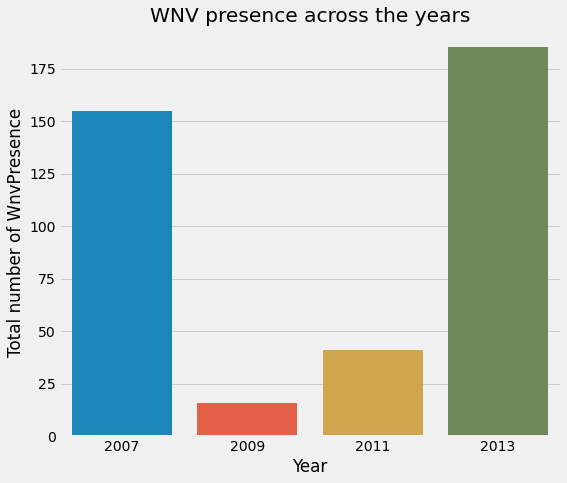

In [ ]:
plt.figure(figsize=(8,7))
sns.barplot(x=['2007','2009', '2011', '2013'],y="WnvPresent",data=train.groupby("year").sum())

plt.title('WNV presence across the years')
plt.xlabel('Year')
plt.ylabel('Total number of WnvPresence') 

2007 and 2013 are the years where the WNV presence recorded were the highest. 2009 and 2011 had little WNV presence recorded. Further investigation needs to be done to see if there was sufficient spray being conducted in 2007 and 2013.

# EDA on test set

In [ ]:
# Display first 5 rows
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [ ]:
# No null values
test.isnull().sum().sum()

0

In [ ]:
# No duplicates
test.duplicated(keep=False).sum()

0

## Check for Species types

In [ ]:
train['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [ ]:
test['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [ ]:
# DF with Unspecified Culex in them 
unspecified_culex = test[~test['Species'].isin(train['Species'])]
unspecified_culex.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
6,7,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",UNSPECIFIED CULEX,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
14,15,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",UNSPECIFIED CULEX,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9
22,23,2008-06-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",UNSPECIFIED CULEX,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8
30,31,2008-06-11,"1500 West Webster Avenue, Chicago, IL 60614, USA",UNSPECIFIED CULEX,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8
38,39,2008-06-11,"2500 West Grand Avenue, Chicago, IL 60654, USA",UNSPECIFIED CULEX,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8


 There is a `UNSPECIFIED CULEX` Species which is not found in the training set, a dummy column will be created in the training set for consistency before training the model.

In [ ]:
test['Species'].value_counts(normalize=True) * 100

CULEX PIPIENS/RESTUANS    13.207158
CULEX RESTUANS            12.614689
CULEX PIPIENS             12.486564
CULEX SALINARIUS          12.343821
CULEX TERRITANS           12.340382
CULEX TARSALIS            12.336942
UNSPECIFIED CULEX         12.335222
CULEX ERRATICUS           12.335222
Name: Species, dtype: float64

The `Species` type are fairly balanced

## Investigating the unique traps in the test set

In [ ]:
# These traps are not found in the training set
test_only_traps = test[~test['Trap'].isin(train['Trap'])]['Trap'].unique()
test_only_traps

array(['T129', 'T089', 'T145', 'T115', 'T138', 'T200', 'T206', 'T209',
       'T107', 'T097', 'T102', 'T103', 'T157', 'T903', 'T090A', 'T090B',
       'T090C', 'T200A', 'T128A', 'T200B', 'T218A', 'T218C', 'T218B',
       'T227', 'T226', 'T229', 'T002A', 'T002B', 'T234', 'T065A'],
      dtype=object)

There are traps that are unique in the test set but not found in the training set. Similarly, these traps can be added as dummied columns for the training set.

In [ ]:
# These test only traps make 20% of the total test traps
len(test_only_traps)/ len(test['Trap'].unique())

0.20134228187919462